2024-03-17 09:59:08,226:INFO:Epoch:1 time:17.18
2024-03-17 09:59:25,597:INFO:Epoch:2 time:17.37
2024-03-17 09:59:44,304:INFO:Epoch:3 time:18.71
2024-03-17 10:00:02,935:INFO:Epoch:4 time:18.63
2024-03-17 10:00:19,998:INFO:Epoch:5 time:17.06
2024-03-17 10:00:37,018:INFO:Epoch:6 time:17.02
2024-03-17 10:00:54,300:INFO:Epoch:7 time:17.28
2024-03-17 10:01:09,963:INFO:Epoch:8 time:15.66
2024-03-17 10:01:25,251:INFO:Epoch:9 time:15.29
2024-03-17 10:01:40,834:INFO:Epoch:10 time:15.58
2024-03-17 10:01:55,985:INFO:Epoch:11 time:15.15
2024-03-17 10:02:11,747:INFO:Epoch:12 time:15.76
2024-03-17 10:02:27,385:INFO:Epoch:13 time:15.64
2024-03-17 10:02:43,010:INFO:Epoch:14 time:15.63
2024-03-17 10:02:58,202:INFO:Epoch:15 time:15.19
2024-03-17 10:03:13,637:INFO:Epoch:16 time:15.44
2024-03-17 10:03:29,089:INFO:Epoch:17 time:15.45
2024-03-17 10:03:44,292:INFO:Epoch:18 time:15.20
2024-03-17 10:03:59,624:INFO:Epoch:19 time:15.33
2024-03-17 10:04:14,888:INFO:Epoch:20 time:15.26
2024-03-17 10:04:31,942:INFO:

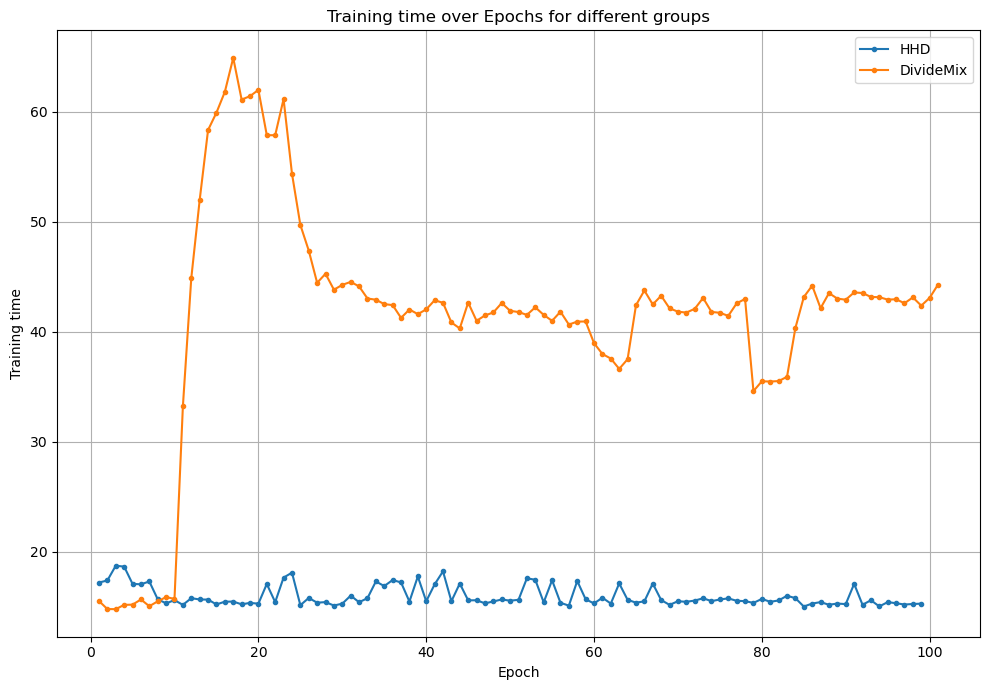

In [2]:
# 绘制对比折线
import matplotlib.pyplot as plt
import re

# 定义读取和解析日志文件的函数
def parse_log_file(log_file_path):
    groups = {
        "HHD":[],
        "DivideMix":[]
    }
    
    # 读取日志文件
    with open(log_file_path, 'r') as file:
        log_content = file.readlines()
    
    current_group = None
    
    # 解析日志内容
    for line in log_content:
        if "Start Training with: " in line:
            current_group = line.split(": ")[-1].strip()
        elif "time:" in line:
            print(line.split(": ")[-1].rstrip('%\n'))
            accuracy = float(line.split(":")[-1].rstrip('%\n'))
            if current_group in groups:
                groups[current_group].append(accuracy)
    
    return groups

# 绘制准确率折线图的函数
def plot_accuracies(groups):
    plt.figure(figsize=(10, 7))
    for group, accuracies in groups.items():
        epochs = range(1, len(accuracies) + 1)
        plt.plot(epochs, accuracies, marker='o', linestyle='-',markersize=3, label=f'{group}')
    
    plt.title('Training time over Epochs for different groups')
    plt.xlabel('Epoch')
    plt.ylabel('Training time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 指定日志文件路径
log_file_path = './time_compare.log'

# 解析日志文件
groups = parse_log_file(log_file_path)

# 绘制准确率折线图
plot_accuracies(groups)